In [15]:
%matplotlib notebook
import gba
import numpy as np
import matplotlib.pyplot as plt

In [16]:
m = np.linspace(2, 8, 200)
r = np.linspace(0,2.0,200)
fb_data = np.array([3.8221, 6.7219, 5.6877, 14.739,22.047, 31.288, 15.537,
                    3.8673,1.2311])*1e-4
pdf = np.zeros((m.size,r.size))
m_marginal = m.copy()
r_marginal = r.copy()

In [17]:
nsim = 30
nbands = 9
time_since_p = 3.0

g = gba.GbA(nbands,nsim)
g.init()
g.set_samples(m,r)
g.process(fb_data,time_since_p,gba.TData.vertical)
g.get_pdf(pdf,m_marginal,r_marginal)

<IPython.core.display.Javascript object>


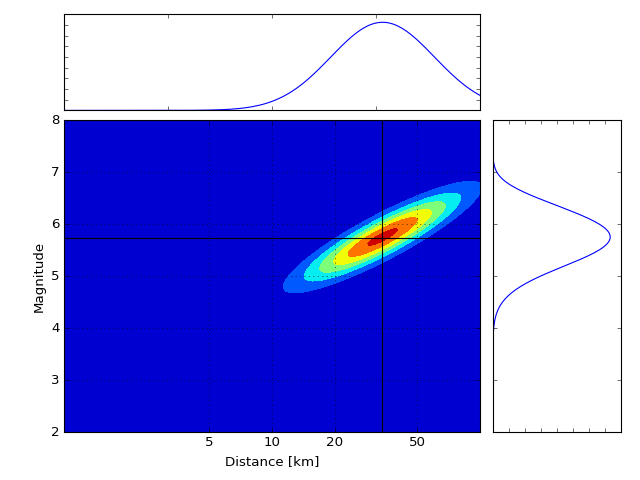

In [18]:
from matplotlib.ticker import NullFormatter

fig = plt.figure()

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rectpdf = [left, bottom, width, height]
rectr = [left, bottom_h, width, 0.2]
rectm = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
fig = plt.figure(1, figsize=(8, 8))
axpdf = fig.add_axes(rectpdf)
axm = fig.add_axes(rectm)
axr = fig.add_axes(rectr)

axpdf.contourf(r, m, pdf)
axpdf.set_xticks([np.log10(x) for x in [5,10,20,50]])
axpdf.set_xticklabels([5,10,20,50])
axpdf.grid()

# plot marginals
axm.plot(m_marginal,m)
axr.plot(r,r_marginal)
mhat = m[np.argmax(m_marginal)]
rhat = r[np.argmax(r_marginal)]
axpdf.vlines(rhat,m.min(),m.max(),color='k')
axpdf.hlines(mhat,r.min(),r.max(),color='k')

axpdf.set_xlabel('Distance [km]')
axpdf.set_ylabel('Magnitude')

# no labels
nullfmt = NullFormatter()
axm.yaxis.set_major_formatter(nullfmt)
axm.xaxis.set_major_formatter(nullfmt)
axr.yaxis.set_major_formatter(nullfmt)
axr.xaxis.set_major_formatter(nullfmt)
